# Breast Cancer Prediction

## EDA and project Explanations

In [336]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn import metrics 
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
%matplotlib inline

In [337]:
df=pd.read_csv("data.csv")

In [338]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
358,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.047210,0.023810,...,17.70,65.27,302.0,0.10150,0.12480,0.09441,0.04762,0.2434,0.07431,NaN
428,90769601,B,11.130,16.62,70.47,381.1,0.08151,0.03834,0.013690,0.013700,...,20.29,74.35,421.1,0.10300,0.06219,0.04580,0.04044,0.2383,0.07083,NaN
561,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.000000,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,NaN
501,91504,M,13.820,24.49,92.33,595.9,0.11620,0.16810,0.135700,0.067590,...,32.94,106.00,788.0,0.17940,0.39660,0.33810,0.15210,0.3651,0.11830,NaN
234,882488,B,9.567,15.91,60.21,279.6,0.08464,0.04087,0.016520,0.016670,...,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178,NaN
130,866714,B,12.190,13.29,79.08,455.8,0.10660,0.09509,0.028550,0.028820,...,17.81,91.38,545.2,0.14270,0.25850,0.09915,0.08187,0.3469,0.09241,NaN
461,911296202,M,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.363500,0.168900,...,31.37,251.20,4254.0,0.13570,0.42560,0.68330,0.26250,0.2641,0.07427,NaN
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.000000,...,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592,NaN
230,881972,M,17.050,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.109000,...,24.89,133.50,1189.0,0.17030,0.39340,0.50180,0.25430,0.3109,0.09061,NaN
309,893548,B,13.050,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,...,17.40,93.96,672.4,0.10160,0.05847,0.01824,0.03532,0.2107,0.06580,NaN


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [340]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [341]:
df.shape

(569, 33)

In [342]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 32 numerical features : ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

We have 1 categorical features : ['diagnosis']


### Missing Values Treatment

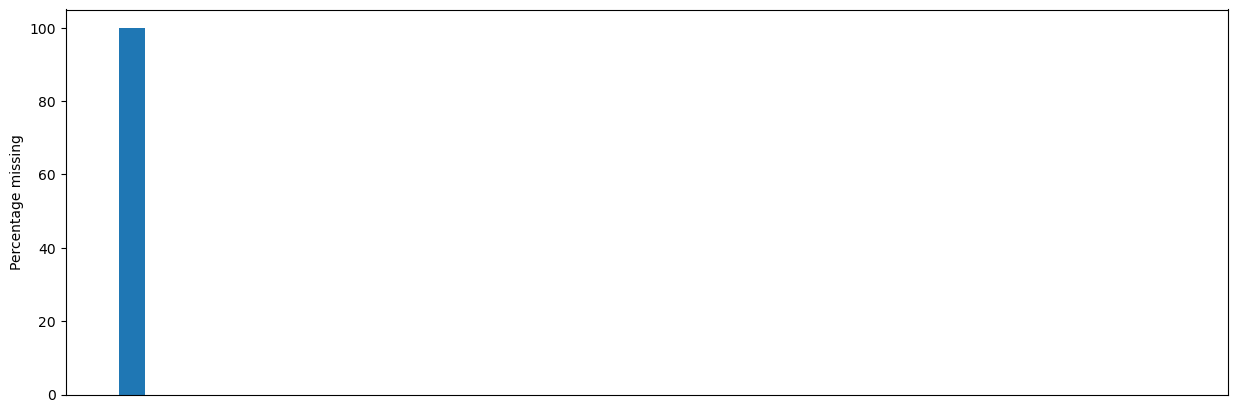

In [343]:
# Plotting Missing values count for each column
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()


In [344]:
missing

,0
Unnamed: 32,100.0
compactness_se,0.0
fractal_dimension_worst,0.0
symmetry_worst,0.0
concave points_worst,0.0
concavity_worst,0.0
compactness_worst,0.0
smoothness_worst,0.0
area_worst,0.0
perimeter_worst,0.0


##### Droped and then Update

In [345]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

### Looking at the distribution of Target variable

In [346]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

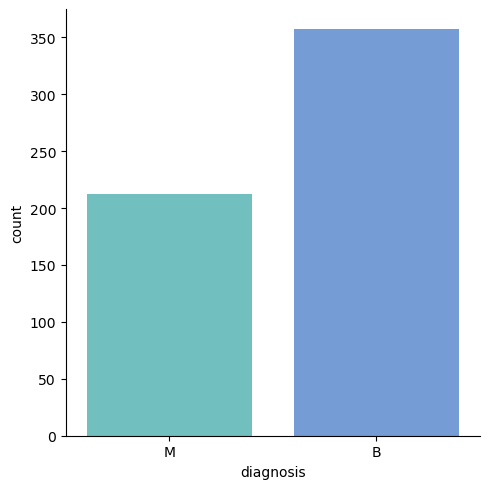

In [347]:
B = df[df['diagnosis']=='B'].shape[0]
M = df[df['diagnosis']=='M'].shape[0]
sns.catplot(data=df, x="diagnosis", kind="count", palette="winter_r", alpha=.6)
plt.show()

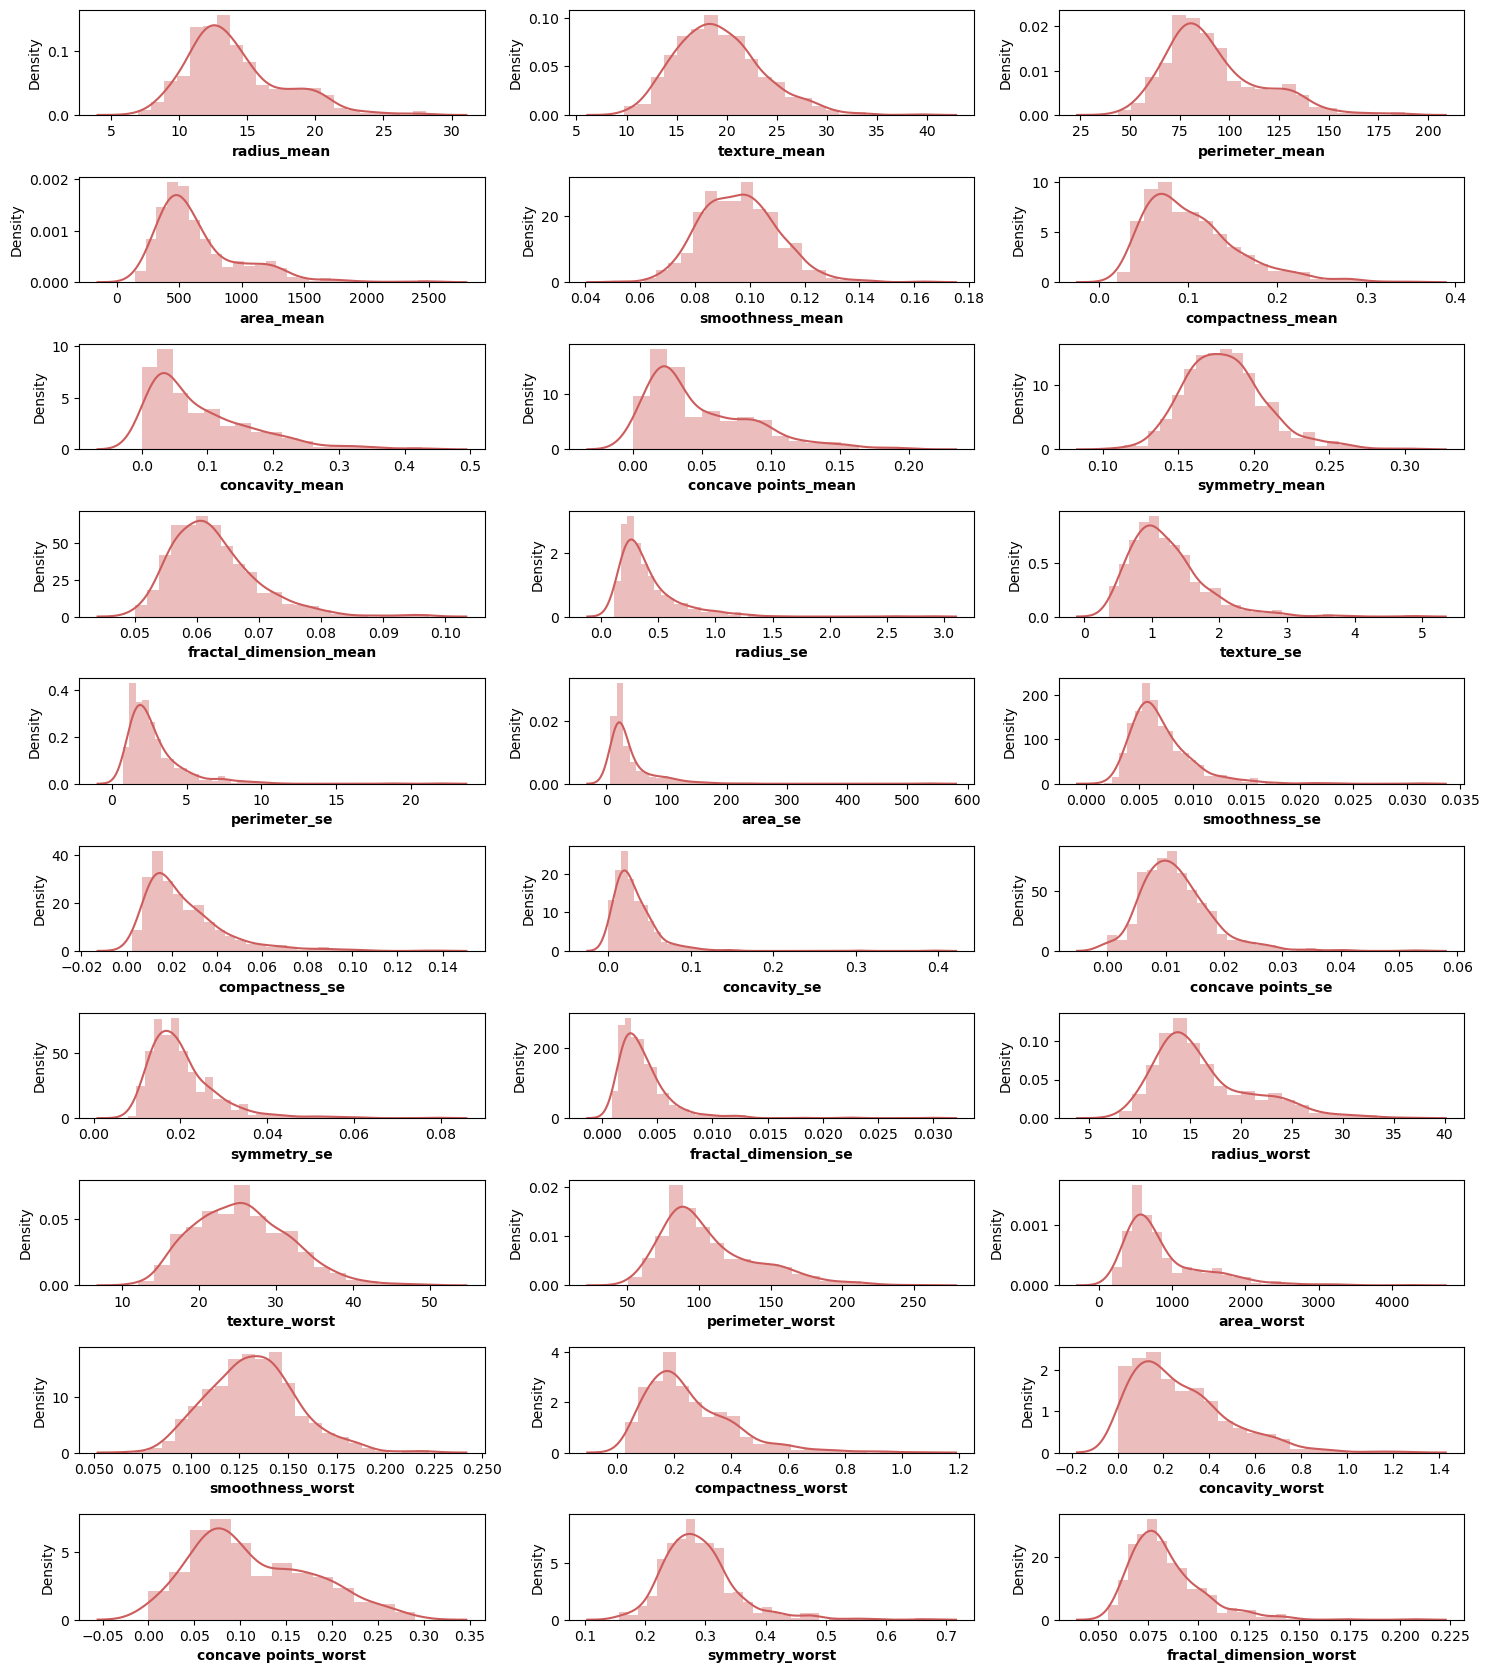

In [348]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### Report
1. Transformation of data is not of prime importance since it is a classification problem
2. Interpreting each and every column is not neccessary as this is sensor data.

In [349]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Evaluate Model on Different Experiments

### Split the data in "X" and "Y"

In [350]:
# Splitting X and y for all Experiments
X= df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [351]:
y= y.replace({'M': 1, 'B': 0})


## Initialize Default Models in a Dictionary

In [352]:
models={
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "Logistic Reg":LogisticRegression(),
    "K-Neighbors":KNeighborsClassifier(),
    "XGBClassifier":XGBClassifier(),
    "Cat Boosting":CatBoostClassifier(verbose=False),
    "Ada Boosting":AdaBoostClassifier()
}

In [353]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

# fit vs fit_transform vs transform
# 1. value are adjusted
# 2. values are tranformed
# 3. both actions one by one

## Principle Component Analysis with Imputing Median
1. PCA is a technique for feature extraction - so it combones our input variables in specific way, then we can drop the "least important" variables while still retaining the most valuable parts of all of the variables!

In [354]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline(steps=[
    ('StandardScaler',StandardScaler())
])

X_pca=pca_pipeline.fit_transform(X)


In [355]:
X_pca

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [356]:
var_ratio={}
for n in range(2,31):
    pc=PCA(n_components=n)
    df_pca=pc.fit(X_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)


<Axes: >

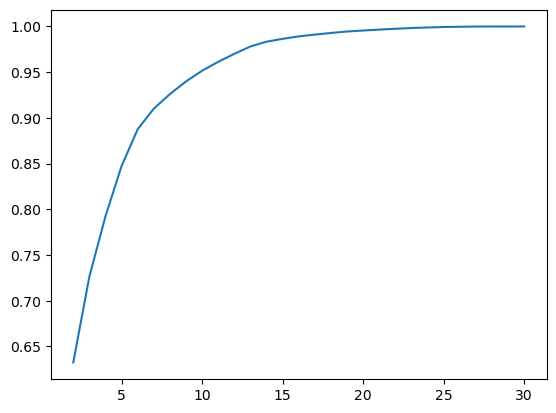

In [357]:

# Variance Plot
pd.Series(var_ratio).plot()

<Figure size 500x500 with 0 Axes>

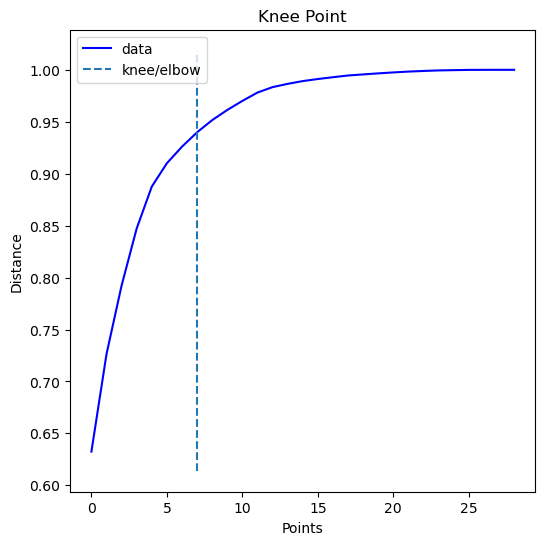

Knee Locator k = 9


In [358]:
# Kneed Algorithm to find the ELBOW point


from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= components[knee.knee]
print('Knee Locator k =', k)


In [359]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=9,random_state=42).fit(X_pca)

X_pca=pca_final.fit_transform(X_pca)

## Handling Imbalanced Data

SMOTE+TOMEK is one of such a hybrod technique that aims to clean overlapping data points for each of the classes distributed in sample space.
1. This method combines the SMOTE ability to generate data for minority class and TOMEK Links ability to remove the data that are identified as TOMEK links from the majority class.

In [360]:
# Resampling the minority class. The strategy can be changed as required.
from imblearn.combine import SMOTETomek
smt_final = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)

## Fitting the Model and get Reports

### Report Making 

In [361]:

# Fit the model to generate the data.
X_res_final, y_res_final = smt_final.fit_resample(X_pca, y)
X_train, X_test, y_train, y_test = train_test_split(X_res_final, y_res_final, test_size=0.2, random_state=42)


In [362]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

def confusion_matrix_info(y_true, y_pred) -> list:
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = [tn, fp, fn, tp]
    return cost

In [371]:
models_list = []
accuracy_list = []
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    clf = clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)


    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)


    # Training set performance
    model_train_accuracy, model_train_f1,model_train_precision,\
    model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_pred_train)
    train_cost = [confusion_matrix_info(y_train, y_pred_train)]


    # Test set performance
    model_test_accuracy,model_test_f1,model_test_precision,\
    model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_pred_test)
    test_cost = confusion_matrix_info(y_test, y_pred_test)

    print(f"Classifier: {type(clf).__name__}")
    models_list.append(type(clf).__name__)
    print('Model performance for Training set')
    print(f"- Training Accuracy: {train_accuracy:.4f}")
    print('- F1 score: {:.4f}'.format(model_train_f1)) 
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    print(f'- COST: {train_cost}.')
    
    
    print('Model performance for Test set')
    print(f"- Test Accuracy: {test_accuracy:.4f}")
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    print(f'- COST: {test_cost}.')
    print("*************************************")
    accuracy_list.append(test_accuracy)

In [372]:

# Initialize classifiers
classifiers = {
    'Random_Forest': RandomForestClassifier(),
    'Decision_Tree': DecisionTreeClassifier(),
    'Gradient_Boosting': GradientBoostingClassifier(),
    'Logistic_Reg': LogisticRegression(),
    'K_Neighbors': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(),
    'Ada_Boosting': AdaBoostClassifier()
}


In [373]:

# Evaluate each classifier and collect results
for clf_name, clf in classifiers.items():
    evaluate_classifier(clf, X_train, X_test, y_train, y_test)



Classifier: RandomForestClassifier
Model performance for Training set
- Training Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: [[288, 0, 0, 281]].
Model performance for Test set
- Test Accuracy: 0.9930
- F1 score: 0.9933
- Precision: 1.0000
- Recall: 0.9867
- Roc Auc Score: 0.9933
- COST: [68, 0, 1, 74].
*************************************
Classifier: DecisionTreeClassifier
Model performance for Training set
- Training Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: [[288, 0, 0, 281]].
Model performance for Test set
- Test Accuracy: 0.9720
- F1 score: 0.9737
- Precision: 0.9610
- Recall: 0.9867
- Roc Auc Score: 0.9713
- COST: [65, 3, 1, 74].
*************************************
Classifier: GradientBoostingClassifier
Model performance for Training set
- Training Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: [[28

In [374]:
accuracy_list_percentage = [accuracy * 100 for accuracy in accuracy_list]

In [375]:
# Create DataFrame
report = pd.DataFrame({
    'Model Name': models_list,
    'Accuracy': accuracy_list_percentage
})

# Sort DataFrame by 'Accuracy' in ascending order
report_sorted = report.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display sorted report
print(report_sorted)

                   Model Name   Accuracy
0      RandomForestClassifier  99.300699
1          AdaBoostClassifier  99.300699
2  GradientBoostingClassifier  98.601399
3               XGBClassifier  98.601399
4          LogisticRegression  97.902098
5        KNeighborsClassifier  97.902098
6      DecisionTreeClassifier  97.202797


# The Best Model is Random Forest Classifier with 99.30% accuracy.
*****************

## How to Automate ML pipeline !

In [376]:
def mape(y_true , y_pred):
    y_true , y_pRed = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [377]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('Accuracy: {}'.format(accuracy_score(y_predection,y_test)*100))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

RandomForestClassifier
Training score : 1.0
r2 score : 0.9719607843137255
Accuracy: 99.3006993006993
MAE : 0.006993006993006993
MSE : 0.006993006993006993
RMSE : 0.08362420100070908
MAPE : nan


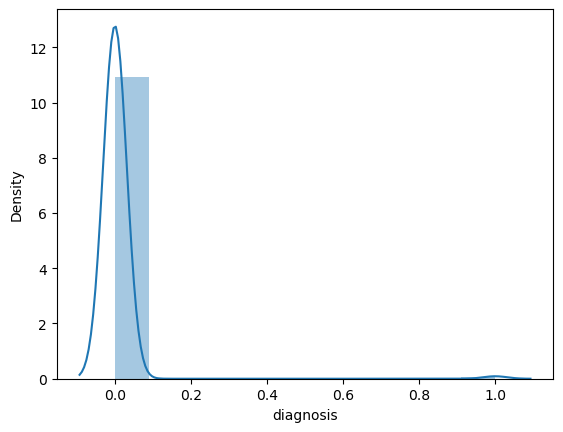

In [378]:
final_model=report_sorted['Model Name'][0]
print(final_model)
predict(RandomForestClassifier())

****************